In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.svm import SVC

In [2]:
dataSet = pd.read_csv('heart.csv')
dataSet.head(10)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
dataSet.shape

(303, 14)

In [4]:
print(dataSet.columns)
for column in dataSet.columns:
    missingCol = len(dataSet[dataSet[column].isna()])
    print(column, ": ", missingCol)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
age :  0
sex :  0
cp :  0
trtbps :  0
chol :  0
fbs :  0
restecg :  0
thalachh :  0
exng :  0
oldpeak :  0
slp :  0
caa :  0
thall :  0
output :  0


In [5]:
indicators = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
              'exng', 'oldpeak', 'slp', 'caa', 'thall']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(dataSet[indicators], dataSet['output'], test_size=0.2)

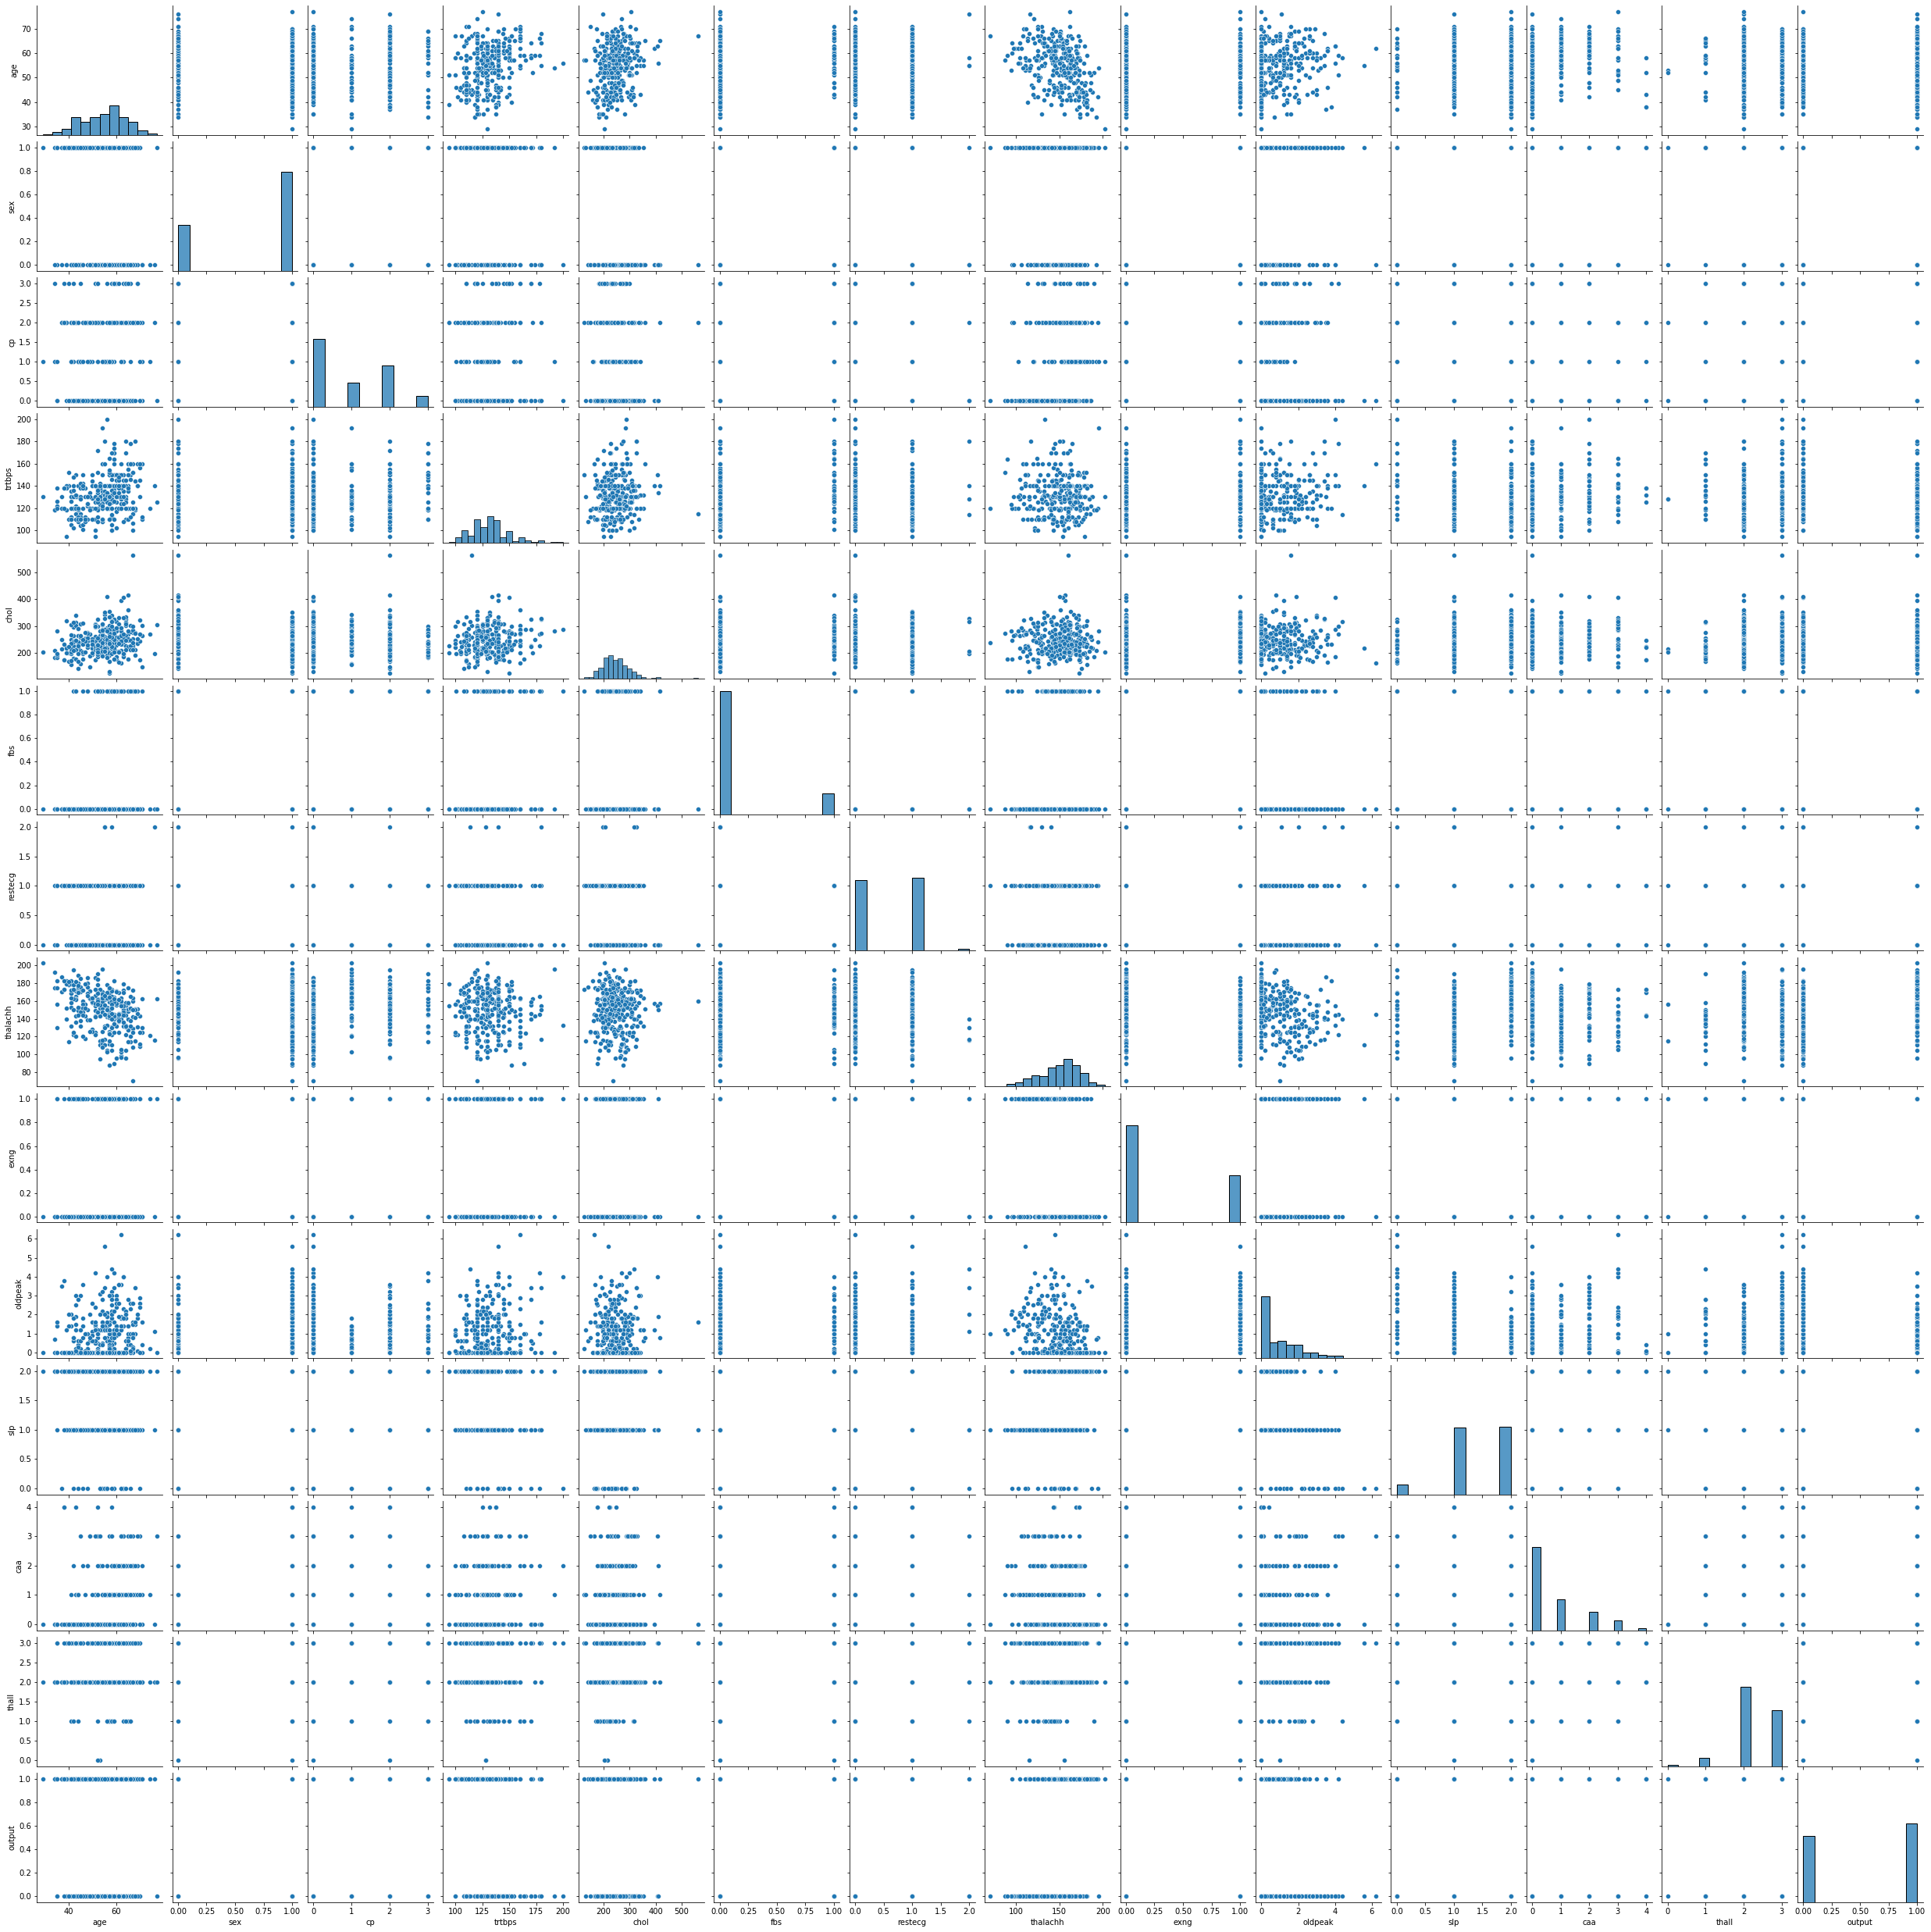

In [7]:
sns.pairplot(dataSet)

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree1.fit(x_train, y_train)
tree1.feature_importances_

array([0.09663786, 0.06873838, 0.36361641, 0.02000762, 0.04039708,
       0.        , 0.        , 0.03128252, 0.0251741 , 0.02697225,
       0.02532395, 0.14722814, 0.15462169])

<BarContainer object of 13 artists>

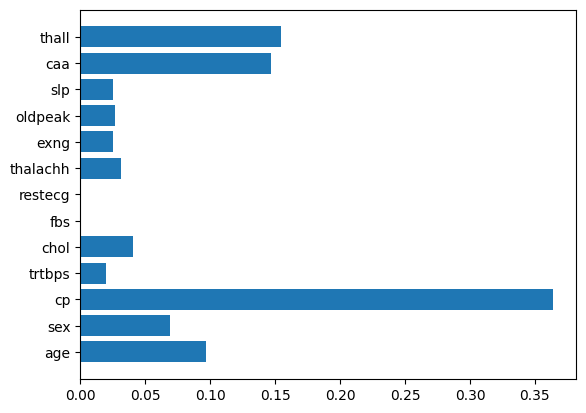

In [9]:
plt.barh(y=indicators, width=tree1.feature_importances_)

In [10]:
y_val_pred = tree1.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.7704918032786885


In [11]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }
grid = GridSearchCV(make_pipeline(SVC(kernel='rbf', gamma=0.1)),
                    param_grid,
                    cv=kfold,
                    refit=True)

grid.fit(x_train, y_train)
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [12]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

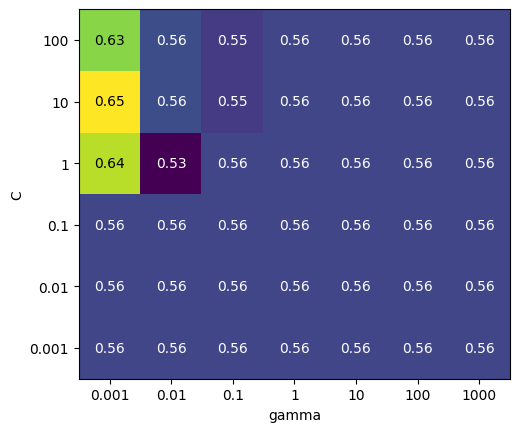

In [13]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 7)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=grid.param_grid['svc__gamma'], ylabel='C',
        yticklabels=grid.param_grid['svc__C'], cmap="viridis")
plt.show()

In [14]:
model = SVC(C=10, kernel='rbf', gamma=0.001)
model.fit(x_train, y_train)
y_val_pred = model.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.6557377049180327


In [15]:
indicators.remove('slp')
indicators.remove('fbs')
indicators.remove('restecg')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(dataSet[indicators], dataSet['output'], test_size=0.2)

In [17]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }
grid2 = GridSearchCV(make_pipeline(SVC(kernel='rbf', gamma=0.1)),
                     param_grid,
                     cv=kfold,
                     refit=True)

grid2.fit(x_train, y_train)
grid2.best_params_

{'svc__C': 1, 'svc__gamma': 0.001}

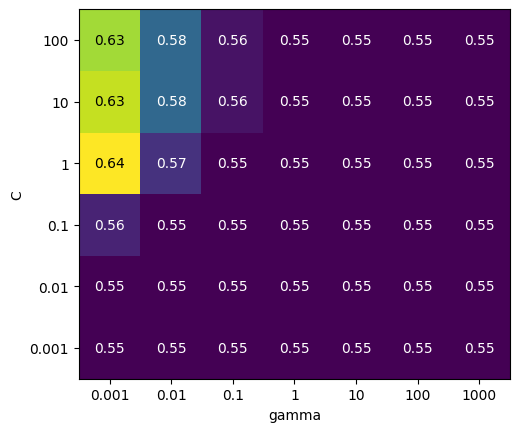

In [18]:
results = pd.DataFrame(grid2.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 7)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=grid2.param_grid['svc__gamma'], ylabel='C',
        yticklabels=grid2.param_grid['svc__C'], cmap="viridis")
plt.show()

In [19]:
model2 = SVC(C=1, kernel='rbf', gamma=0.001)
model2.fit(x_train, y_train)
y_val_pred = model2.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.7049180327868853


In [24]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
model3.fit(x_train, y_train)
y_val_pred = model3.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.7704918032786885


In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)
tree.feature_importances_

array([0.02540364, 0.00506382, 0.43884341, 0.06561712, 0.01653491,
       0.        , 0.0416917 , 0.16196055, 0.1611816 , 0.08370324])

<BarContainer object of 10 artists>

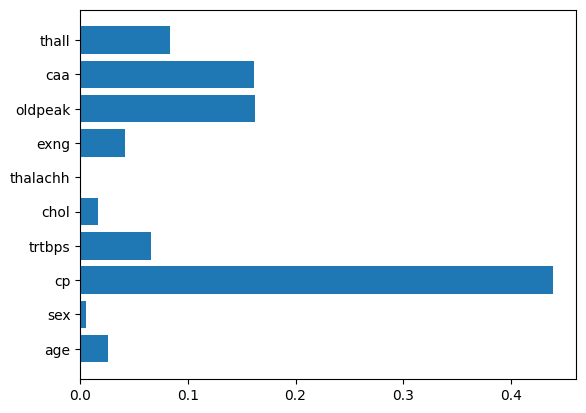

In [26]:
plt.barh(y=indicators, width=tree.feature_importances_)

In [27]:
y_val_pred = tree.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.7377049180327869


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from keras.callbacks import History

scaler = StandardScaler()
features = indicators
x_train = scaler.fit_transform(x_train[features].values)
y_train = pd.get_dummies(y_train).values

history = History()
model = Sequential()

model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100)

2022-06-20 12:04:12.181536: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 12:04:12.181576: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-20 12:04:14.889624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-20 12:04:14.890139: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-20 12:04:14.890189: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hania-dell): /proc/driver/nvidia/version does not exist
2022-06-20 12:04:14.891009: I tensorflow/core/platform/cpu_feature

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6119 - accuracy: 0.7397
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.7479
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7438
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.7479
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5463 - accuracy: 0.7562
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7603
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7562
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7603
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7686
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7686
Epoch 11/100
8/8 [===========

In [29]:
x_test = scaler.fit_transform(x_test[features].values)
pred_x = model.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 6ms/step
Model Accuracy: 0.7377049180327869


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 22        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


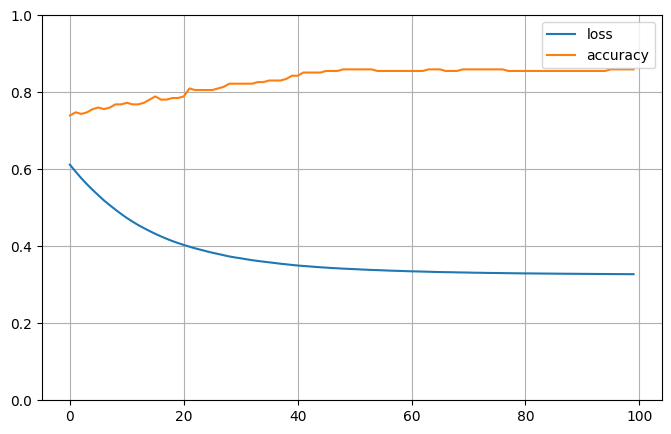

In [31]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
history2 = History()
model2 = Sequential()

model2.add(Dense(100))
model2.add(Dense(100))
model2.add(Dense(100))
model2.add(Dense(100))
model2.add(Dense(2))
model2.add(Activation("softmax"))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.5602 - accuracy: 0.7149
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3754 - accuracy: 0.8306
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8388
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8512
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8471
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8554
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.8636
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3328 - accuracy: 0.8636
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8595
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3327 - accuracy: 0.8636
Epoch 11/100
8/8 [===========

In [43]:
pred_x = model2.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 4ms/step
Model Accuracy: 0.7377049180327869


In [44]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1100      
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 2)                 202       
                                                                 
 activation_4 (Activation)   (None, 2)                 0         
                                                                 
Total params: 31,602
Trainable params: 31,602
Non-trai

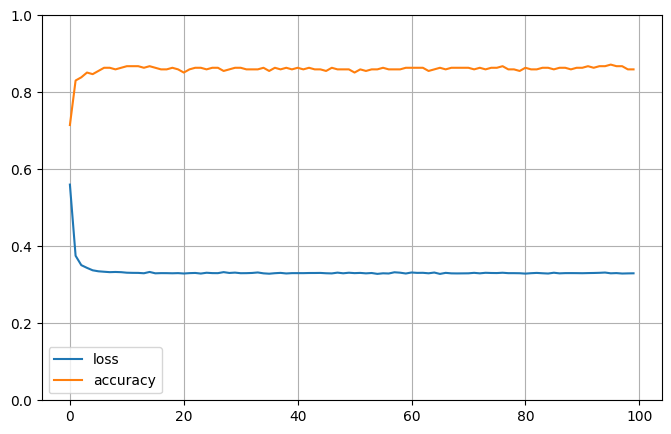

In [45]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
from tensorflow import keras

model3 = keras.models.Sequential([
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(2, activation="softmax")
])

model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
25/25 [==============================] - 1s 6ms/step - loss: 0.6709 - accuracy: 0.5537
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7438
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.8223
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.4012 - accuracy: 0.8554
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.8471
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.8512
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3763 - accuracy: 0.8223
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8554
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8388
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8388
Epoch 11/

In [47]:
pred_x = model3.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 2ms/step
Model Accuracy: 0.7540983606557377


In [48]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 300)               3300      
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dense_21 (Dense)            (None, 2)                 202       
                                                                 
Total params: 33,602
Trainable params: 33,602
Non-trainable params: 0
_________________________________________________________________


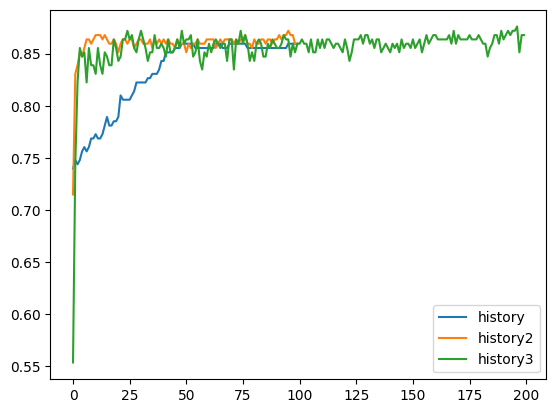

In [49]:
plt.plot(history.history['accuracy'], label="history")
plt.plot(history2.history['accuracy'], label="history2")
plt.plot(history3.history['accuracy'], label="history3")
plt.legend()

plt.show()